# Polynomial curve fitting stress test
Author: Atma, amani@esri.com

This notebook is intended as a moderate stress test for the DSX infrastructure. Notebook generates a known function, adds random noise to it and runs an ML algorithm on a wild goose chase asking it to fit and predict based on this data.

Right now I am running this against 10 Million points. To increase the complexity, you can do two things
 - Increase the number of points (direct hit)
 - Increase the complexity of the function (indirect)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Create a linear stream of `10`million points between `-50` and `50`.

In [62]:
x = np.arange(-50,50,0.00001)
x.shape

(10000000,)

Create random noise of same dimension

In [63]:
bias = np.random.standard_normal(x.shape)

### Define the function

In [71]:
y2 = np.cos(x)**3 * (x**2/max(x)) + bias*20

Plotting algorithms cannot work with millions of points, so you downsample just for plotting

In [19]:
stepper = int(x_train.shape[0]/1000)
stepper

7000

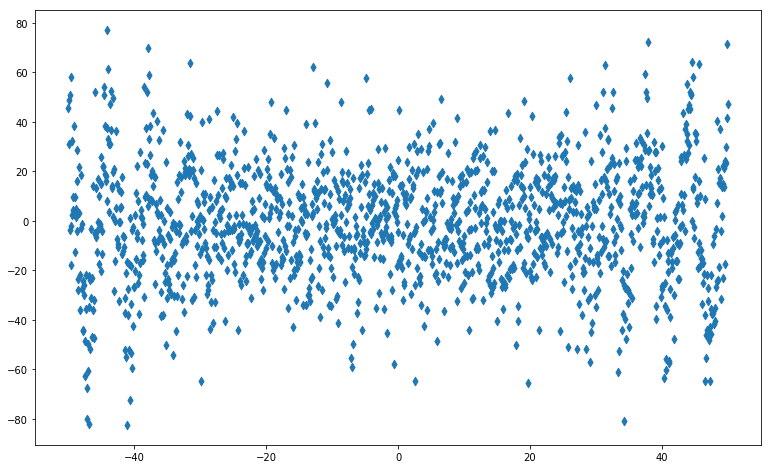

In [72]:
fig, ax = plt.subplots(1,1, figsize=(13,8))
ax.scatter(x[::stepper],y2[::stepper], marker='d')

### Train test split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y2, test_size=0.3)

In [74]:
x_train.shape

(7000000,)

Let us define a function that will try to fit against the training data. It starts with lower order and sequentially increases the complexity of the model. The hope is, somewhere here is the sweet spot of low bias and variance. We will find it empirically

### Curve fitting

In [78]:
def greedy_fitter(x_train, y_train, x_test, y_test, max_order=25):
    """Fitter will try to find the best order of 
    polynomial curve fit for the given synthetic data"""
    import time
    train_predictions=[]
    train_rmse=[]
        
    test_predictions=[]
    test_rmse=[]
    
    for order in range(1,max_order+1):
        t1 = time.time()
        coeff = np.polyfit(x_train, y_train, deg=order)
        n_order = order
        count = 0
        y_predict = np.zeros(x_train.shape)
        while n_order >=0:
            y_predict += coeff[count]*x_train**n_order
            count+=1
            n_order = n_order-1
        
        # append to predictions
        train_predictions.append(y_predict)
        
        # find training errors
        current_train_rmse =np.sqrt(mean_squared_error(y_train, y_predict))
        train_rmse.append(current_rmse)
        
        # predict and find test errors
        n_order = order
        count = 0
        y_predict_test = np.zeros(x_test.shape)
        while n_order >=0:
            y_predict_test += coeff[count]*x_test**n_order
            count+=1
            n_order = n_order-1
        
        # append test predictions
        test_predictions.append(y_predict_test)
        # find test errors
        current_test_rmse =np.sqrt(mean_squared_error(y_test, y_predict_test))
        test_rmse.append(current_test_rmse)
        
        t2 = time.time()
        elapsed = round(t2-t1, 3)
        print("Elapsed: " + str(elapsed) + \
              "s Order: " + str(order) + \
              " Train RMSE: " + str(round(current_train_rmse, 4)) + \
              " Test RMSE: " + str(round(current_test_rmse, 4)))
    
    return (train_predictions, train_rmse, test_predictions, test_rmse)

Run the model. Change the `max_order` to higher or lower if you wish

In [76]:
%%time
complexity=5
train_predictions, train_rmse, test_predictions, test_rmse = greedy_fitter(
    x_train, y_train, x_test, y_test, max_order=complexity)

Elapsed: 0.99Order: 1 RMSE: 23.4132
Elapsed: 1.471Order: 2 RMSE: 23.4099
Elapsed: 1.988Order: 3 RMSE: 23.4099
Elapsed: 2.591Order: 4 RMSE: 23.409
Elapsed: 3.435Order: 5 RMSE: 23.409
Elapsed: 4.239Order: 6 RMSE: 23.4066
Elapsed: 5.073Order: 7 RMSE: 23.4066
Elapsed: 6.076Order: 8 RMSE: 23.3724
Elapsed: 6.636Order: 9 RMSE: 23.3724
Elapsed: 7.354Order: 10 RMSE: 23.2479
Elapsed: 8.013Order: 11 RMSE: 23.2479
Elapsed: 9.02Order: 12 RMSE: 22.9992
Elapsed: 9.541Order: 13 RMSE: 22.9992
Elapsed: 10.211Order: 14 RMSE: 22.723
Elapsed: 10.964Order: 15 RMSE: 22.723
Elapsed: 11.598Order: 16 RMSE: 22.6015
Elapsed: 12.728Order: 17 RMSE: 22.6015
Elapsed: 13.882Order: 18 RMSE: 22.6005
Elapsed: 14.326Order: 19 RMSE: 22.6005
Elapsed: 14.97Order: 20 RMSE: 22.4037
Elapsed: 15.642Order: 21 RMSE: 22.4037
Elapsed: 16.75Order: 22 RMSE: 22.0931
Elapsed: 17.871Order: 23 RMSE: 22.0931
Elapsed: 18.172Order: 24 RMSE: 22.0692


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 19.316Order: 25 RMSE: 22.0692


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 18.081Order: 26 RMSE: 22.0749


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 20.949Order: 27 RMSE: 22.0749


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 21.428Order: 28 RMSE: 21.687


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 22.233Order: 29 RMSE: 21.687


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 23.63Order: 30 RMSE: 21.5686


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 23.463Order: 31 RMSE: 21.5686


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 24.723Order: 32 RMSE: 21.4799


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 25.436Order: 33 RMSE: 21.4799


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 26.102Order: 34 RMSE: 21.43


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 27.426Order: 35 RMSE: 21.43


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 27.445Order: 36 RMSE: 21.4152


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 28.37Order: 37 RMSE: 21.4152


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 30.242Order: 38 RMSE: 21.4234


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 31.301Order: 39 RMSE: 21.4234


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 31.618Order: 40 RMSE: 21.4083


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 32.628Order: 41 RMSE: 21.4083


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 32.256Order: 42 RMSE: 21.3748


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 33.697Order: 43 RMSE: 21.3748


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 34.718Order: 44 RMSE: 21.0916


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 35.539Order: 45 RMSE: 21.0916


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 35.546Order: 46 RMSE: 21.1124


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 36.663Order: 47 RMSE: 21.1124


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 38.108Order: 48 RMSE: 21.1414


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 38.744Order: 49 RMSE: 21.1414


C:\Users\atma6951\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:10: RankWarning: Polyfit may be poorly conditioned
  # Remove the CWD from sys.path while we load stuff.


Elapsed: 39.064Order: 50 RMSE: 21.171
Wall time: 16min 22s


## Plot results
How well did the models fit against training data?

### Training results

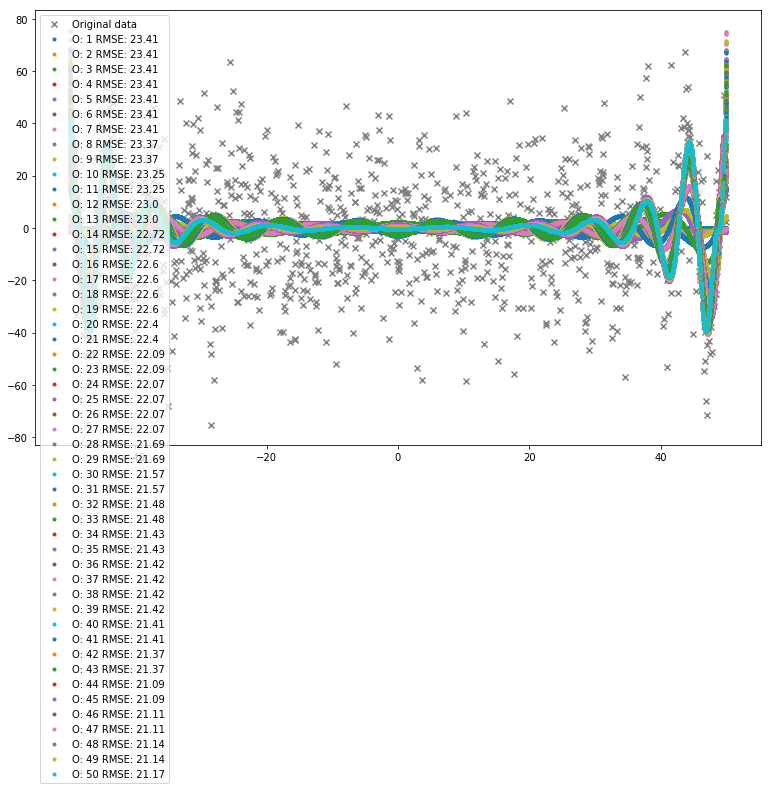

In [77]:
%%time
fig, axes = plt.subplots(1,1, figsize=(26,8))
axes.scatter(x_train[::stepper], y_train[::stepper], 
             label='Original data', color='gray', marker='x')
order=1
for p, r in zip(train_predictions, train_rmse):
    axes.scatter(x_train[:stepper], p[:stepper], 
                 label='O: ' + str(order) + " RMSE: " + str(round(r,2)),
                 marker='.')
    order+=1
axes.legend(loc=0)

### Test results

In [ ]:
%%time
fig, axes = plt.subplots(1,1, figsize=(26,8))
axes.scatter(x_test[::stepper], y_test[::stepper], 
             label='Test data', color='gray', marker='x')
order=1
for p, r in zip(test_predictions, test_rmse):
    axes.scatter(x_test[:stepper], p[:stepper], 
                 label='O: ' + str(order) + " RMSE: " + str(round(r,2)),
                 marker='.')
    order+=1
axes.legend(loc=0)

### Bias vs Variance

In [ ]:
fig, axes = plt.subplots(1,1)
axes.scatter(range(1,complexity+1), test_rmse)